
<a id='chap-tpreseauxneuronesmulticouches3'></a>

#  Réseaux de neurones multicouches (2) : reconnaissance de chiffres


Reprendre la méthodologie utilisée pour classifier les iris dans l'exercice précédent, et l'adapter au cas de la reconnaissance des chiffres manuscrits.

### Données `digits`

Nous reprenons les [données digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html?highlight=digits#sklearn.datasets.load_digits), un ensemble d’images en faible résolution (8 x 8 pixels) de chiffres manuscrits, déjà disponible dans Scikit-learn. 

(1797, 64)


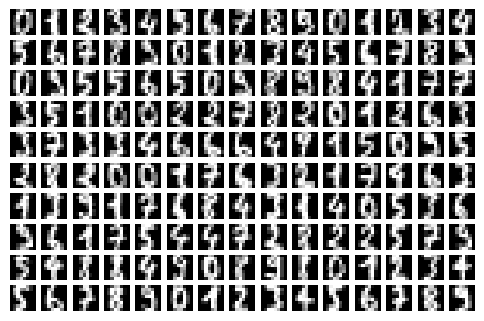

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)
print(X.shape)
plt.figure(dpi=100)
for i in range(150):
    plt.subplot(10,15,i+1)
    plt.imshow(X[i,:].reshape([8,8]), cmap='gray')
    plt.axis('off')
plt.show()

In [4]:
#On fixe une graine aleatoire
np.random.seed(0)

Avant de faire apprendre des réseaux de neurones Séparer les données en ensembles d’apprentissage et de test :

In [18]:
from sklearn.model_selection import train_test_split
Xa, Xt, Ya, Yt = train_test_split(X,y,test_size=0.4,shuffle=True)

### Classification par PMC linéaire à une couche cachée

Notre premier modèle est un PMC linéaire à une couche cachée de 2 neurones :

In [19]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(2,), activation='identity', solver='adam', max_iter=5000, random_state=100)
clf.fit(Xa, Ya)
print("Matrice de poids entrées -> couche cachée : {}".format(clf.coefs_[0].shape))
print("Matrice de poids couche cachée -> sorties : {}".format(clf.coefs_[1].shape))
train_score = clf.score(Xa, Ya)
print("Le score en train est {}".format(train_score))
test_score = clf.score(Xt, Yt)
print("Le score en test est {}".format(test_score))

Matrice de poids entrées -> couche cachée : (64, 2)
Matrice de poids couche cachée -> sorties : (2, 10)
Le score en train est 0.8191094619666048
Le score en test est 0.7579972183588317


In [17]:
clf.intercepts_

[array([-0.18168534,  0.35060542]),
 array([-0.35572113,  0.7566159 , -3.27449712, -2.59978909, -1.54078009,
        -0.62823558,  0.18139109,  3.60729705,  1.26823242,  0.69236049])]

Recalculer et afficher les valeurs des deux neurones de la couche cachée. que constatez-vous?

In [27]:
W1 = clf.coefs_[0].T
b1 = clf.intercepts_[0].reshape(2,1)
Z1 = W1.dot(Xa.T) + b1

A1 = Z1
print(A1)

[[-11.57050236  19.46298502  -9.05212907 ...   8.83047441   1.49841802
    5.09560609]
 [  0.10743437 -16.19652053  -1.86797396 ... -11.76103742 -11.528798
    4.84588989]]


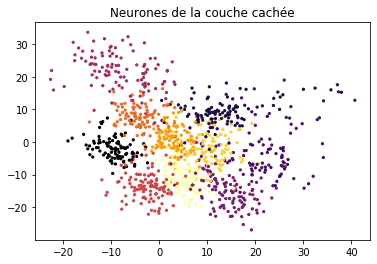

In [26]:
plt.title("Neurones de la couche cachée")
plt.scatter(A1[0,:],A1[1,:],cmap = 'inferno', c = Ya, s = 5)
plt.show()

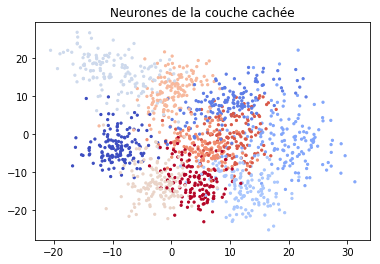

In [10]:

plt.title("Neurones de la couche cachée")
plt.show()

### Classification par PMC non linéaire à plusieurs couches cachées

### Question :

Employez un PMC à trois couches cachées de 40, 2 et respectivement 10 neurones et une fonction d’activation sigmoïde. Examinez les valeurs obtenues dans la couche cachée de 2 neurones, que constatez-vous?

### Correction :


Le score en train est 0.8002783576896312
Le score en test est 0.7305555555555555


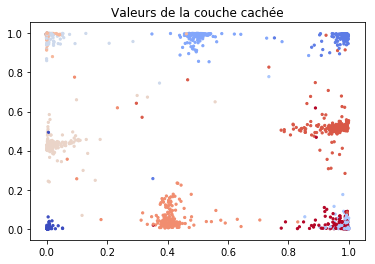

In [12]:
from sklearn.neural_network import MLPClassifier


plt.title("Valeurs de la couche cachée")
plt.show()